## CA1C - Probabilities and Likeihood from Datasets


In [1]:
# set up environment
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation as cv
import numpy as np

## Load the movielens data, and join it

**Read in individual files into dataframes**

In [2]:
## Ratings ##
# create column names for ratings file
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
# read in ratings file (u.data)
ratings = pd.read_csv('u.data', sep='\t', names=r_cols , encoding='latin-1')

ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
movie_id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
## Movies ##
# create column names for movies file
m_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'action', 'adventure', 'animation', 'childrens', 
         'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller',
         'war', 'western']
# read in movies file (u.item)
movies = pd.read_csv('u.item', sep='|', names=m_cols, encoding='latin-1')
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie_id              1682 non-null int64
movie_title           1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
IMDb_URL              1679 non-null object
unknown               1682 non-null int64
action                1682 non-null int64
adventure             1682 non-null int64
animation             1682 non-null int64
childrens             1682 non-null int64
comedy                1682 non-null int64
crime                 1682 non-null int64
documentary           1682 non-null int64
drama                 1682 non-null int64
fantasy               1682 non-null int64
film_noir             1682 non-null int64
horror                1682 non-null int64
musical               1682 non-null int64
mystery               1682 non-null int64
romance               1682 non-null int64
sci_fi                1682 non-null int64
thriller 

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
## Users ##
# create column names for users file
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
# read in users file (u.user)
users = pd.read_csv('u.user', sep='|', names=u_cols, encoding='latin-1')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Merge into single dataframe

One line per rating, showing details of rating, movie rated and user

In [5]:
# merge ratings and movie dataframes
temp = pd.merge(ratings, movies, on='movie_id', how='inner')
temp.info()
temp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 27 columns):
user_id               100000 non-null int64
movie_id              100000 non-null int64
rating                100000 non-null int64
timestamp             100000 non-null int64
movie_title           100000 non-null object
release_date          99991 non-null object
video_release_date    0 non-null float64
IMDb_URL              99987 non-null object
unknown               100000 non-null int64
action                100000 non-null int64
adventure             100000 non-null int64
animation             100000 non-null int64
childrens             100000 non-null int64
comedy                100000 non-null int64
crime                 100000 non-null int64
documentary           100000 non-null int64
drama                 100000 non-null int64
fantasy               100000 non-null int64
film_noir             100000 non-null int64
horror                100000 non-null int64
musical     

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,action,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# merge temp (ratings&movies) with users
movie_lens = pd.merge(temp, users, on='user_id', how='inner')
movie_lens.info()
movie_lens.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 31 columns):
user_id               100000 non-null int64
movie_id              100000 non-null int64
rating                100000 non-null int64
timestamp             100000 non-null int64
movie_title           100000 non-null object
release_date          99991 non-null object
video_release_date    0 non-null float64
IMDb_URL              99987 non-null object
unknown               100000 non-null int64
action                100000 non-null int64
adventure             100000 non-null int64
animation             100000 non-null int64
childrens             100000 non-null int64
comedy                100000 non-null int64
crime                 100000 non-null int64
documentary           100000 non-null int64
drama                 100000 non-null int64
fantasy               100000 non-null int64
film_noir             100000 non-null int64
horror                100000 non-null int64
musical     

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,action,...,mystery,romance,sci_fi,thriller,war,western,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,...,0,0,0,0,0,0,49,M,writer,55105


In [7]:
# drop video release (contains no data), IMDb URL (contains movie name and year already in dataset)
# duplication of data, and correlated to other columns so could lead to overfitting in logistic regression
del movie_lens['video_release_date']
del movie_lens['IMDb_URL']
movie_lens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
user_id         100000 non-null int64
movie_id        100000 non-null int64
rating          100000 non-null int64
timestamp       100000 non-null int64
movie_title     100000 non-null object
release_date    99991 non-null object
unknown         100000 non-null int64
action          100000 non-null int64
adventure       100000 non-null int64
animation       100000 non-null int64
childrens       100000 non-null int64
comedy          100000 non-null int64
crime           100000 non-null int64
documentary     100000 non-null int64
drama           100000 non-null int64
fantasy         100000 non-null int64
film_noir       100000 non-null int64
horror          100000 non-null int64
musical         100000 non-null int64
mystery         100000 non-null int64
romance         100000 non-null int64
sci_fi          100000 non-null int64
thriller        100000 non-null int64
war            

In [8]:
# investigate 9 missing release date entries
# return rows with no values/null values
movie_lens[movie_lens.isnull().any(axis=1)]
# leave in as they have ratings and genders attached for unknown genre type and release date not being used in model

,user_id,movie_id,rating,timestamp,movie_title,release_date,unknown,action,adventure,animation,...,mystery,romance,sci_fi,thriller,war,western,age,gender,occupation,zip_code
1711,1,267,4,875692955,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,24,M,technician,85711
4776,532,267,3,875441348,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,20,M,student,92705
17957,319,267,4,875707690,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,38,M,programmer,22030
20011,268,267,3,875742077,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,24,M,engineer,19422
21645,297,267,3,875409139,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,29,F,educator,98103
32870,833,267,1,875655669,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,34,M,writer,90019
34295,422,267,4,875655986,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,26,M,entertainment,94533
42528,5,267,4,875635064,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,33,F,other,15213
53849,130,267,5,875801239,unknown,NaN,1,0,0,0,...,0,0,0,0,0,0,20,M,none,60115


## Create Box-Plots
**For each of 2 separate occupations of your choice, boxplot the distribution of scores for each of 2 genres of your choice.**

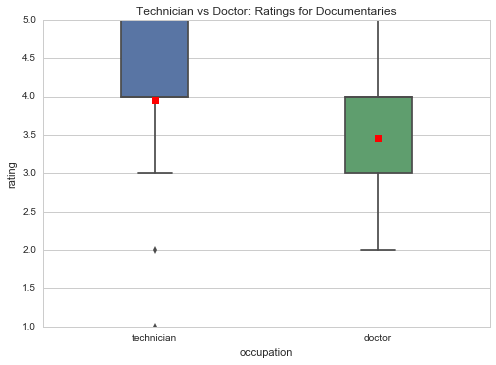

In [9]:
# Select all where occupation is technician and genre is documentary
technician_documentary = movie_lens[(movie_lens.occupation == 'technician') & (movie_lens.documentary == 1)]

# Select all where occupation is doctor and genre is documentary
doctor_documentary = movie_lens[(movie_lens.occupation == 'doctor') & (movie_lens.documentary == 1)]

sns.set_style('whitegrid')
box1 = sns.boxplot(x=technician_documentary['occupation'], y=technician_documentary['rating'], width=0.3, showmeans=True, )
box2 = sns.boxplot(x=doctor_documentary['occupation'], y=doctor_documentary['rating'], width=0.3, order=['technician', 'doctor'], showmeans=True)
plt.title('Technician vs Doctor: Ratings for Documentaries')

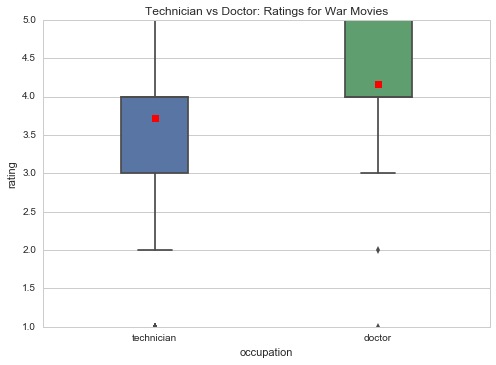

In [10]:
# Select all where occupation is technician and genre is action
technician_war = movie_lens[(movie_lens.occupation == 'technician') & (movie_lens.war)==1]
# Select all where occupation is doctor and genre is action
doctor_war = movie_lens[(movie_lens.occupation == 'doctor') & (movie_lens.war)==1]

box1 = sns.boxplot(x=technician_war['occupation'], y=technician_war['rating'], width=0.3, showmeans=True, )
box2 = sns.boxplot(x=doctor_war['occupation'], y=doctor_war['rating'], width=0.3, order=['technician', 'doctor'], showmeans=True)
plt.title('Technician vs Doctor: Ratings for War Movies')

Investigate no median line showing on boxplots.  Set notch to True to show confidence interval for the median. Shows that median lies on edge of boxes.

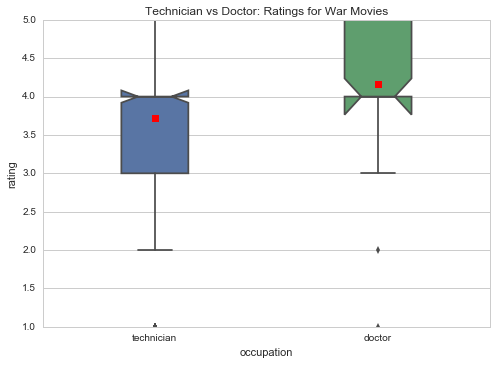

In [11]:
box1 = sns.boxplot(x=technician_war['occupation'], y=technician_war['rating'], width=0.3, showmeans=True, notch=True )
box2 = sns.boxplot(x=doctor_war['occupation'], y=doctor_war['rating'], width=0.3, order=['technician', 'doctor'], showmeans=True, notch=True)
plt.title('Technician vs Doctor: Ratings for War Movies')

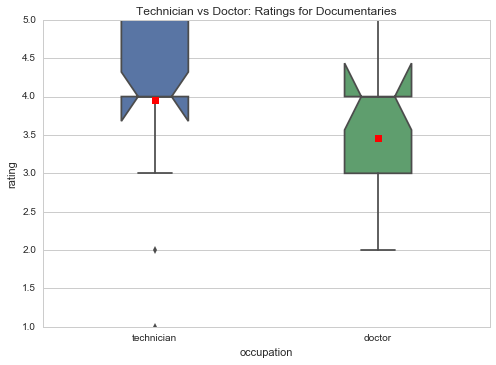

In [12]:
box1 = sns.boxplot(x=technician_documentary['occupation'], y=technician_documentary['rating'], width=0.3, showmeans=True, notch=True)
box2 = sns.boxplot(x=doctor_documentary['occupation'], y=doctor_documentary['rating'], width=0.3, order=['technician', 'doctor'], showmeans=True, notch=True)
plt.title('Technician vs Doctor: Ratings for Documentaries')

## Create a heat map 
**Plot a heat map of user occupation against genre, with the squares of the heatmap coloured corresponding to the average rating.**

In [13]:
# use pd.melt function to merge all genres into one column named genre 
heat = pd.melt(movie_lens[['rating', 'occupation', 'unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war','western']], 
               id_vars=['rating', 'occupation'], var_name='genre')
#heat.info()
# select only the rows where value = 1 i.e. has a value
heat = heat[heat['value'] == 1][['rating', 'occupation', 'genre']]
#heat.info()
heat = pd.pivot_table(heat, columns=['genre'], index=['occupation'], values=['rating'], aggfunc = np.mean)
heat


rating                                                    \
genre            action adventure animation childrens    comedy     crime   
occupation                                                                  
administrator  3.538751  3.521569  3.738916  3.448052  3.494780  3.693805   
artist         3.539773  3.581994  3.421488  3.391089  3.521880  3.676617   
doctor         3.618182  3.561404  3.363636  3.500000  3.559524  3.804878   
educator       3.581549  3.619681  3.593156  3.397976  3.564993  3.752113   
engineer       3.488801  3.538876  3.614325  3.386328  3.433552  3.666121   
entertainment  3.406814  3.365462  3.467742  3.086538  3.296167  3.710145   
executive      3.532178  3.529817  3.560440  3.202586  3.098843  3.505226   
healthcare     3.053726  3.012384  2.865169  2.718310  2.713296  3.045000   
homemaker      3.456522  3.439024  3.111111  2.920000  2.967742  3.360000   
lawyer         3.692580  3.859155  3.771429  3.373494  3.493478  3.747664   
librarian      3.401822  3.404851  3.553459  3.389655  3.456853  3.654054   
marketing      3.484277  3.434959  3.278481  3.092025  3.360748  3.515528   
none           3.724252  3.706250  3.976744  3.725275  3.678431  3.594595   
other          3.475674  3.554158  3.672209  3.488082  3.406951  3.595411   
programmer     3.565891  3.595968  3.660256  3.344768  3.428040  3.669670   
retired        3.410072  3.387500  3.628571  3.281818  3.458984  3.613139   
salesman       3.653153  3.717172  3.666667  3.500000  3.187898  3.860759   
scientist      3.422261  3.442105  3.639344  3.481481  3.446729  3.813559   
student        3.466552  3.484515  3.563457  3.356453  3.375683  3.657407   
technician     3.459685  3.458781  3.606061  3.271493  3.381629  3.509091   
writer         3.285604  3.302671  3.500000  3.324251  3.268742  3.502008   

                                                                             \
genre         documentary     drama   fantasy film_noir    horror   musical   
occupation                                                                    
administrator    3.875000  3.796063  3.468085  3.972789  3.393862  3.596045   
artist           4.147059  3.789969  3.291667  4.234375  3.460784  3.414013   
doctor           3.461538  3.785714  3.000000  4.111111  3.500000  3.592593   
educator         3.775701  3.811259  3.508929  4.064356  3.171021  3.594595   
engineer         3.666667  3.701554  3.200000  3.924138  3.282609  3.517007   
entertainment    3.869565  3.605721  2.960000  3.914894  3.229167  3.367647   
executive        2.192308  3.477612  2.840000  3.603448  3.200000  3.625954   
healthcare       2.600000  2.982267  2.789474  3.100000  2.550000  3.277778   
homemaker        3.500000  3.538462  1.666667  3.250000  3.222222  2.800000   
lawyer           3.900000  3.802947  3.142857  4.500000  3.866667  3.861111   
librarian        3.812500  3.701603  3.218182  3.968750  3.168142  3.348739   
marketing        3.583333  3.608010  3.400000  4.100000  3.418605  3.298246   
none             4.000000  3.932836  3.583333  3.500000  3.857143  3.860465   
other            3.784615  3.719294  3.388889  3.842466  3.244860  3.627208   
programmer       3.725490  3.755714  3.367521  3.886525  3.290488  3.524675   
retired          3.437500  3.514443  3.363636  4.023256  3.318182  3.526882   
salesman         4.000000  3.984227  3.333333  3.785714  3.326531  3.592593   
scientist        3.882353  3.815451  3.150000  4.025641  3.385714  3.549451   
student          3.829060  3.702842  3.048295  3.832714  3.389552  3.501855   
technician       3.958333  3.694981  3.157895  4.021739  3.420732  3.457143   
writer           3.782609  3.511322  3.197183  3.968000  3.107930  3.474265   

                                                                         \
genre           mystery   romance    sci_fi  thriller unknown       war   
occupation                                                                
administrator  3.763636  3.741391  3.650743  3

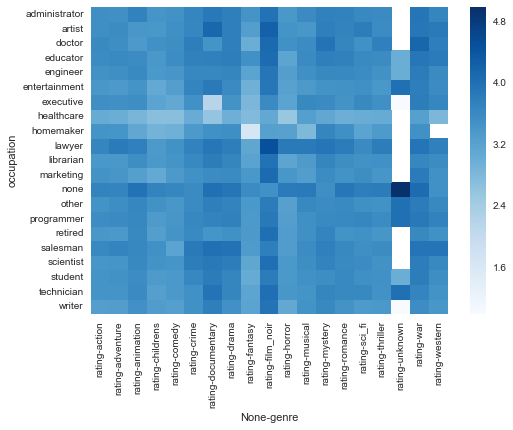

In [14]:
heatmap = sns.heatmap(heat, cmap=plt.cm.Blues)

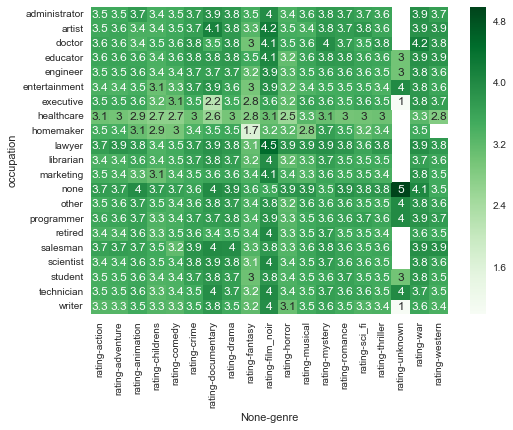

In [15]:
heatmap1 = sns.heatmap(heat, cmap=plt.cm.Greens, annot=True)

## Logistic Regression Model



* Develop a logistic regression model to predict users’ gender based on the average rating they give each genre of movie. 
* Say which genre scores are most predictive of gender, based on the coefficients of the logistic regression model. 
* Report the accuracy of the logistic regression method. 

** Single Logistic Regression Model **

Select attributes for model and convert target (gender) to categorical data type

In [16]:
# change gender to categorical data type
movie_lens['gender'] = movie_lens['gender'].astype('category')
# want model to predict gender by ratings based on genre so drop other columns
regression_data = movie_lens.drop(['user_id', 'movie_id', 'timestamp', 'movie_title', 'release_date', 'age', 'occupation', 'zip_code'], axis=1)
# gender as 1 or 0 instead of M or F (note M=1, F=0)
regression_data['gender'] = regression_data['gender'].cat.codes

#create list of colums used to compare coefficients later
cols = list(regression_data.columns.values)
cols.pop() # remove gender - target variable
#view df
regression_data.head()

,rating,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,...,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,gender
0,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Split into training and testing data and build logistic regression model and get results

In [17]:
def create_log_reg(dataframe, target, test_percent,): 
    # split train and test data according to test %
    train, test = cv.train_test_split(dataframe, test_size = test_percent)

    # identify predictors and target for regression model in train & test data
    x = train.drop([target], axis=1)
    y = train[target]

    test_x = test.drop([target], axis=1)
    test_y = test[target]

    # create and fit regression model
    model = LogisticRegression()
    model.fit(x, y)
    model.predict(test_x)

    # measure performance
    accuracy_train = model.score(x,y)
    #print 'Accuracy on train data', accuracy_train
    accuracy_test = model.score(test_x, test_y)
    #print 'Accuracy on test data', accuracy_test
    coefs = model.coef_
    #print 'Co-efficients', coefs
    return accuracy_train, accuracy_test, coefs
    
single_reg = create_log_reg(regression_data, 'gender', .30)
print 'Training Data Accuracy:', single_reg[0]
print 'Testing Data Accuracy:', single_reg[1]
print 'Coefficients:', single_reg[2]

Training Data Accuracy: 0.741771428571
Testing Data Accuracy: 0.744533333333
Coefficients: [[ 0.00473952 -0.00476694  0.21019298  0.0101129   0.15209113 -0.34364839
  -0.01111931  0.15917476  0.04984345 -0.10086276 -0.00791096  0.09017725
   0.12029723 -0.01198444 -0.04038725 -0.29429832  0.15314896  0.01593695
   0.14488704  0.19663701]]


In [19]:
# match coefficients to variables to intrepret which variables are most predictive
list_coefs = single_reg[2][0].tolist() #convert np.array from model to list
#print list_coefs
col_coef = []
for i in cols:
    j = cols.index(i)
    col_coef.append((i, list_coefs[j]))
for i in col_coef:
    print i

('rating', 0.004739517532703039)
('unknown', -0.004766938709427286)
('action', 0.21019298310633375)
('adventure', 0.010112898603173714)
('animation', 0.15209112748646464)
('childrens', -0.3436483872324062)
('comedy', -0.011119314333993867)
('crime', 0.15917475708536444)
('documentary', 0.04984344746318986)
('drama', -0.10086275798554828)
('fantasy', -0.007910963978726667)
('film_noir', 0.09017725361641331)
('horror', 0.12029722772778322)
('musical', -0.011984440662253678)
('mystery', -0.04038724553257566)
('romance', -0.2942983200584073)
('sci_fi', 0.1531489621012394)
('thriller', 0.015936948688842687)
('war', 0.144887039136983)
('western', 0.19663700571505738)


# Report on Single Regression Model

### Coefficients
When the input dataframe was created, Male was mapped to 1, and female to 0. Coefficients with a higher positive value are more predictive of a male user.  Higher negative values indicate a greater unlikelihood of the user being male and therefore are more predictive of a female user.
The most predictive genres indicating a male user are:  action(.21), western(.20), crime(.16), sci_fi(.16), animation (0.15), war(.14), horror(.12)
The most predictive genres indicating a female user are: childrens(.34), romance(.29) and drama(.10)
(Note: due to the variability of examples when selecting the test and training data when running the model just once leads to variance in the coefficients, however the ranking of the genres does not change significantly)

### Accuracy
Running a single logistic regression model the accuracy varies slightly each time its run again due to the variabilty in the splitting of test and training data. Running the model three separte times gets the following results:

Accuracy on train data 0.7425, 0.7433, 0.7418

Accuracy on test data 0.7429, 0.7410, 0.7445

The model is producing similar results on both the test and train data each time - 74% accuracy



** Logistic Regression Model - run multiple times **

Run Logistic Regression 50 times for each train/test split and get mean and standard deviation of each. Compare these values to determine best split 

In [20]:
# create list of possible sizes for test data between 95/5 and 50/50
test_percentages = (np.linspace(0.05, 0.50, 50)).tolist()

#create placeholder for mean result for each training/testing split
# each element ([0]test_percent, [1]mean_training, [2]std_training, [3]mean_testing, [4]std_testing, [5]Coefficients)
scores = []

for test_percent in test_percentages:
    # create placeholder for results
    training_accuracy = [] 
    testing_accuracy = []
    
    for i in range(50):
        result = create_log_reg(regression_data, 'gender', test_percent)
        training_accuracy.append(result[0])
        testing_accuracy.append(result[1])
            
    scores.append((test_percent, np.mean(training_accuracy), np.std(training_accuracy), np.mean(testing_accuracy),
                   np.std(testing_accuracy)))
        
    #print 'Split: Training:' , (1-test_percent), 'Testing:', test_percent
    #print 'Training Data: Mean:', np.mean(training_accuracy), 'Standard Deviation:', np.std(training_accuracy)
    #print 'Testing Data: Mean:', np.mean(testing_accuracy), 'Standard Deviation:', np.std(testing_accuracy)
    


In [21]:
# turn results of regression into dataframe to analyse results
header = ['test_percent', 'train_mean_accuracy','train_std_dev', 'test_mean_accuracy', 'test_std_dev']
logreg_results = pd.DataFrame(scores, columns=header)
logreg_results

,test_percent,train_mean_accuracy,train_std_dev,test_mean_accuracy,test_std_dev
0,0.050000,0.742626,0.000346,0.742104,0.006578
1,0.059184,0.742479,0.000351,0.744528,0.005585
2,0.068367,0.742641,0.000344,0.742048,0.004685
3,0.077551,0.742664,0.000399,0.741844,0.004743
4,0.086735,0.742639,0.000410,0.742193,0.004316
5,0.095918,0.742658,0.000450,0.742050,0.004243
6,0.105102,0.742610,0.000469,0.742512,0.003991
7,0.114286,0.742591,0.000559,0.742667,0.004331
8,0.123469,0.742639,0.000494,0.742321,0.003504
9,0.132653,0.742573,0.000492,0.742776,0.003218


In [24]:
# summary details
print 'Training Accuracy - range:', logreg_results['train_mean_accuracy'].min(), 'to', logreg_results['train_mean_accuracy'].max(), 'Mean:', logreg_results['train_mean_accuracy'].mean()
print 'Testing Accuracy - range:', logreg_results['test_mean_accuracy'].min(), 'to', logreg_results['test_mean_accuracy'].max(), 'Mean:', logreg_results['test_mean_accuracy'].mean()


Training Accuracy - range: 0.742301567285 to 0.7429344 Mean: 0.742584161485
Testing Accuracy - range: 0.741839208583 to 0.744527791857 Mean: 0.74261416686


In [27]:
# run regression model at best train/test split - result that gives bes accuracy on test data
best_score = create_log_reg(regression_data, 'gender', .06)
print 'Training Data Accuracy:', best_score[0]
print 'Testing Data Accuracy:', best_score[1]
print 'Coefficients:', best_score[2]

Training Data Accuracy: 0.742574468085
Testing Data Accuracy: 0.743
Coefficients: [[-0.00135751  0.18984514  0.19957739  0.02091331  0.18821793 -0.34956439
  -0.01053855  0.17519023  0.04249522 -0.10897618  0.08500406  0.11149185
   0.09447426 -0.01575005 -0.04127364 -0.2766201   0.15968443  0.03060119
   0.13992815  0.26824409]]


In [26]:
# match coefficients to variables to intrepret which variables are most predictive
best_coefs = best_score[2][0].tolist() #convert np.array from model to list
coefs = []
for i in cols:
    j = cols.index(i)
    coefs.append((i, best_coefs[j]))
for i in col_coef:
    print i

('rating', 0.004739517532703039)
('unknown', -0.004766938709427286)
('action', 0.21019298310633375)
('adventure', 0.010112898603173714)
('animation', 0.15209112748646464)
('childrens', -0.3436483872324062)
('comedy', -0.011119314333993867)
('crime', 0.15917475708536444)
('documentary', 0.04984344746318986)
('drama', -0.10086275798554828)
('fantasy', -0.007910963978726667)
('film_noir', 0.09017725361641331)
('horror', 0.12029722772778322)
('musical', -0.011984440662253678)
('mystery', -0.04038724553257566)
('romance', -0.2942983200584073)
('sci_fi', 0.1531489621012394)
('thriller', 0.015936948688842687)
('war', 0.144887039136983)
('western', 0.19663700571505738)


## Report on running logistic regression multiple times
The above dataframe shows the results of running the Logistic Regression 50 times for each of 50 different train/test ratios between 95/5 and 50/50.  The table shows that the results are very stable and always with a very low standard deviation giving more confidence in the model than just a single run.  
The mean of the accuracy on the training data is 74.26% (full range from 74.23% to 74.29%). 
The mean of the accuracy on the test data is 74.26% (full range from 74.18% to 74.45%).  
The marginally best accuracy on the test set (74.45%) was obtained at a train/test split of 94/6. Although as can be seen from the results all splits from 5% to 50% test data obtain similar results.  

Running the regression model with 6% test data results in a training accuracy of 74.26% and test accuracy of 74.3% (note: again slight variations due to variations in data sampled each time model ran)
The genres most predictive of male users were: action(.21), western(.20), crime(.16), sci-fi(.15), animation(.15), war(.14), horror(.12)
The genres most predictive of female users were: childrens(0.34), romance(.29), & drama(0.10). Although there are some slight changes in the coefficient values, the order of the ranking does not change. 
